## Operating on overlapping GeoArrays of varying size 

In [1]:
import geowombat as gwb
import numpy as np

---

In [2]:
fn = '../data/test.tif'

---

In [3]:
with gwb.open(fn) as src:
    garray = src.read(bands=-1)

### Extract a subset of the array

In [4]:
sub_array = garray.extract(row_start=100, rows=500, col_start=100, cols=500)

In [5]:
type(sub_array)

geowombat.geoarray.GeoArray

In [6]:
sub_array.shape

(4, 500, 500)

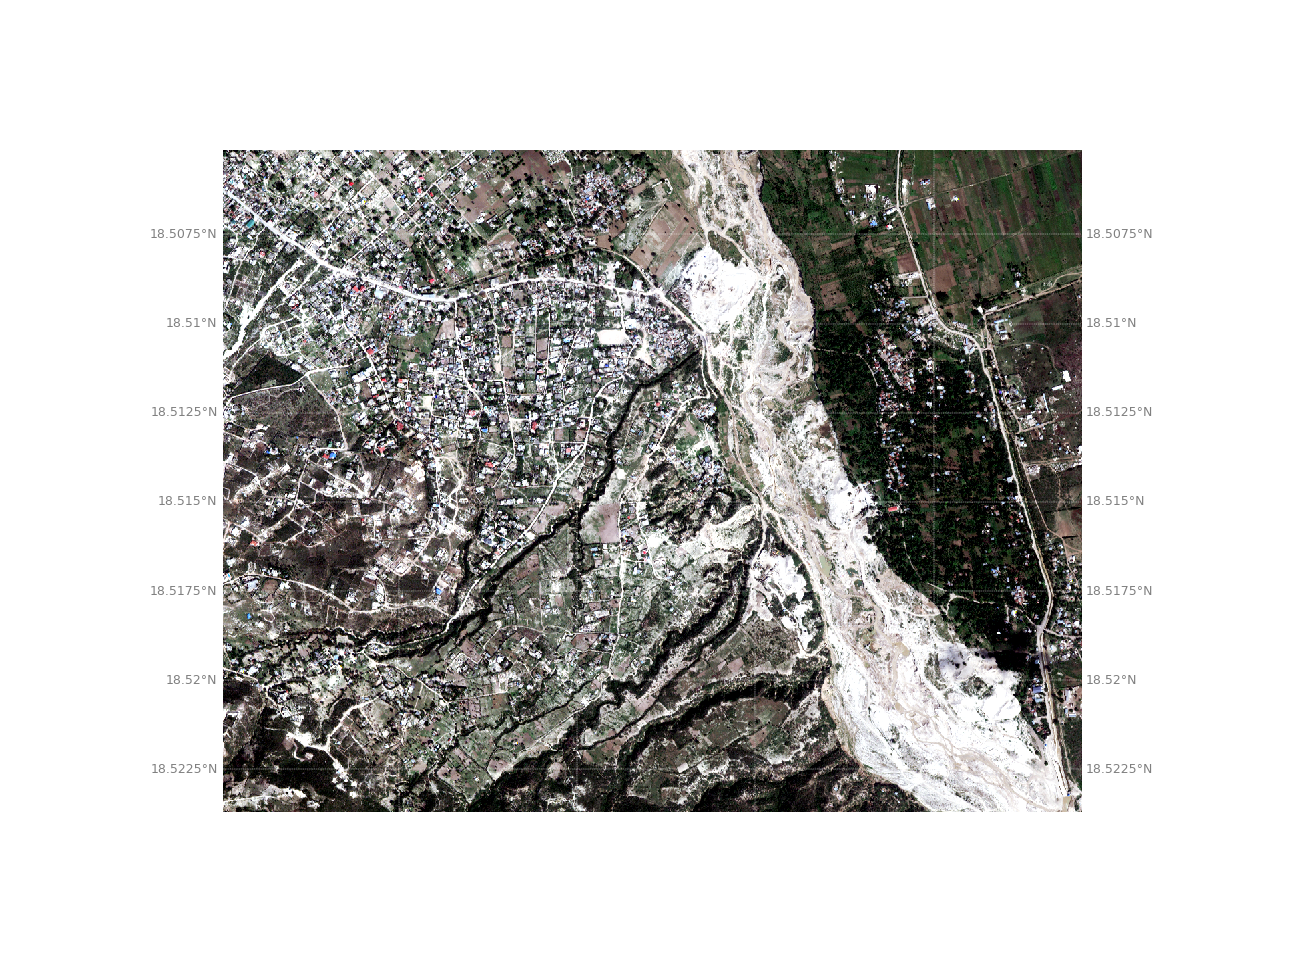

In [7]:
garray.show(bands=[3, 2, 1])

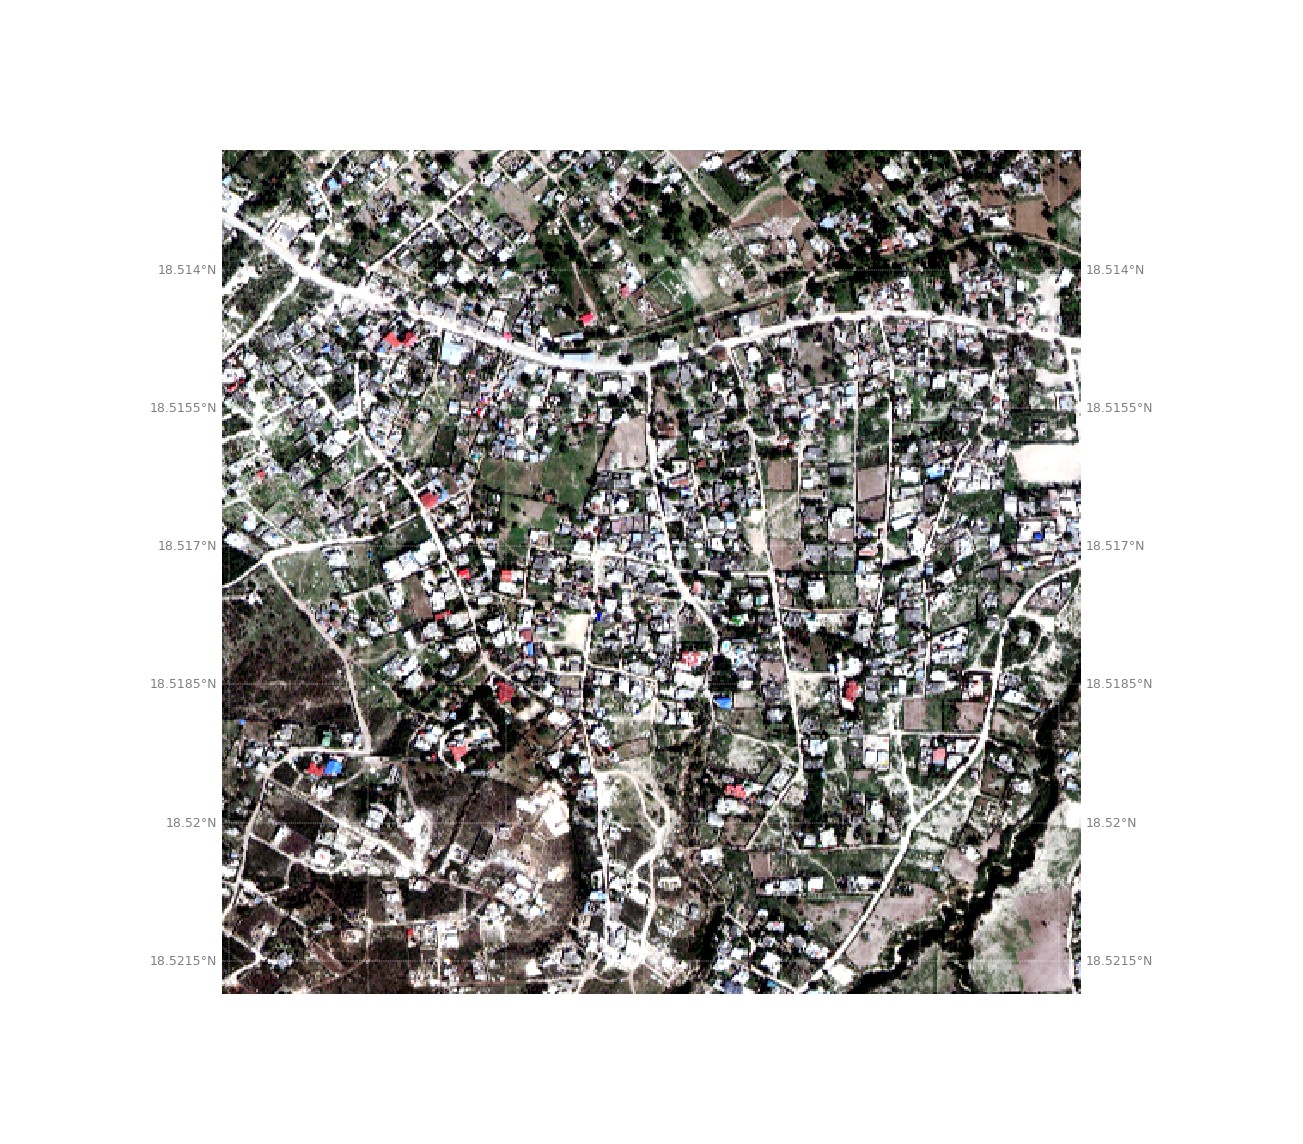

In [9]:
sub_array.show(bands=[3, 2, 1])

Mask the sub-array to highlight the vectorized operations

In [10]:
sub_array[:] = 0

### Adding a `GeoArray` with a `NumPy` array of different size will return an error

In [11]:
garray + np.array(sub_array)

ValueError: operands could not be broadcast together with shapes (4,1008,1287) (4,500,500) 

### Adding a `GeoArray` with another `GeoArray` of different size will, by default, take the extent of the first array

In [13]:
garray_add = garray + sub_array.astype(float)

In [14]:
type(garray_add)

geowombat.geoarray.GeoArray

In [15]:
garray_add.shape

(4, 1008, 1287)

In [16]:
garray_add.dtype

dtype('uint8')

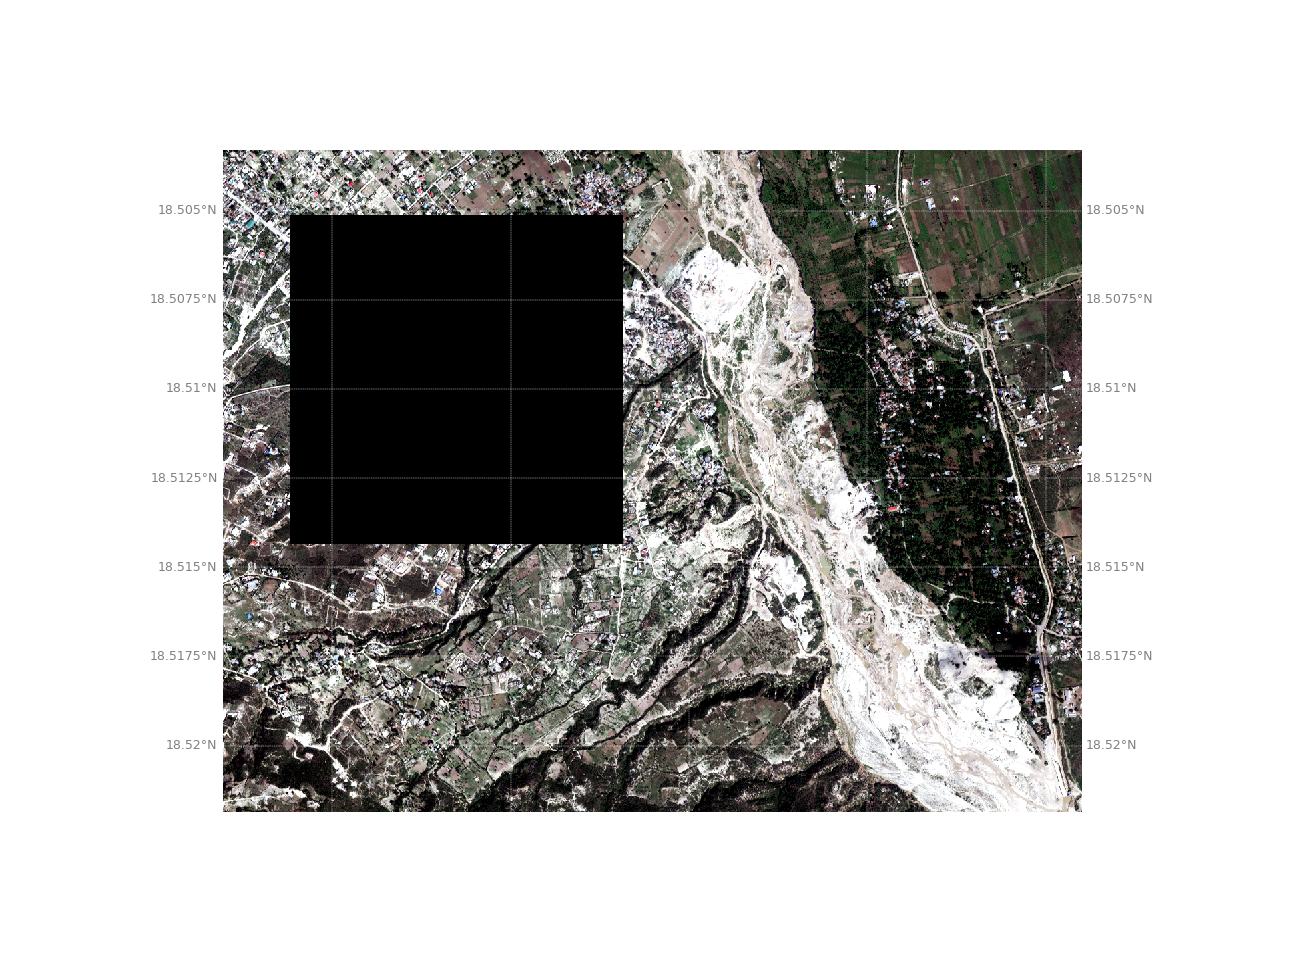

In [17]:
garray_add.show(bands=[3, 2, 1])

### For operations other than using the first array's exent, the math operation must be called explicitly

`GeoWombat's` math operators begin with _geo_.

In [26]:
with gwb.open(fn) as src:
    garray = src.read(bands=-1)

In [27]:
sub_array[:] = 10

In [28]:
garray_add = garray.geo_add(sub_array.astype(float), how='intersection')

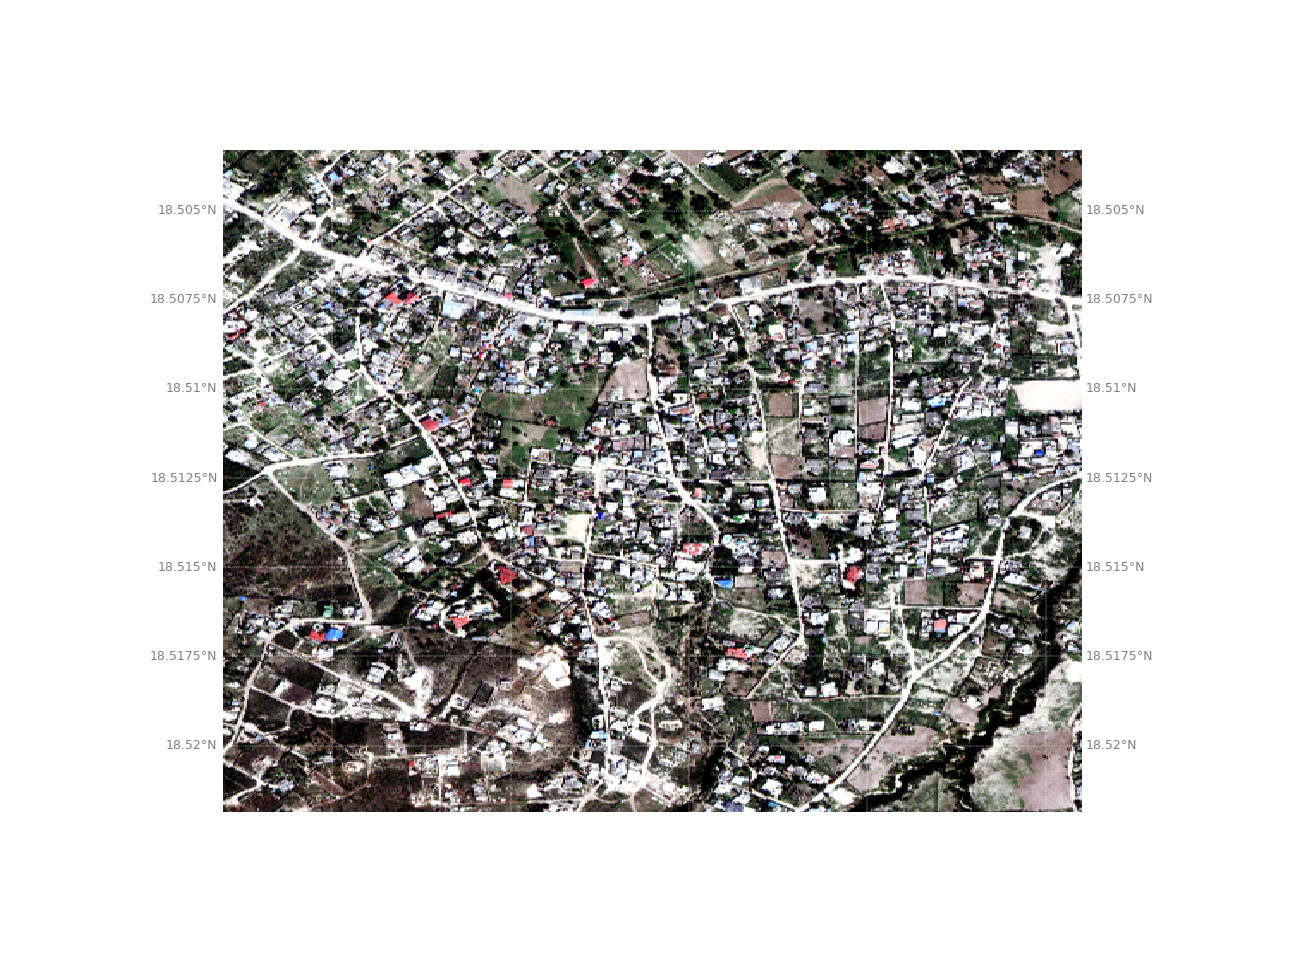

In [29]:
garray_add.show(bands=[3, 2, 1])

### In place operations are not supported

In [30]:
garray *= sub_array

ValueError: operands could not be broadcast together with shapes (4,1008,1287) (4,500,500) (4,1008,1287) 

### Combine operations

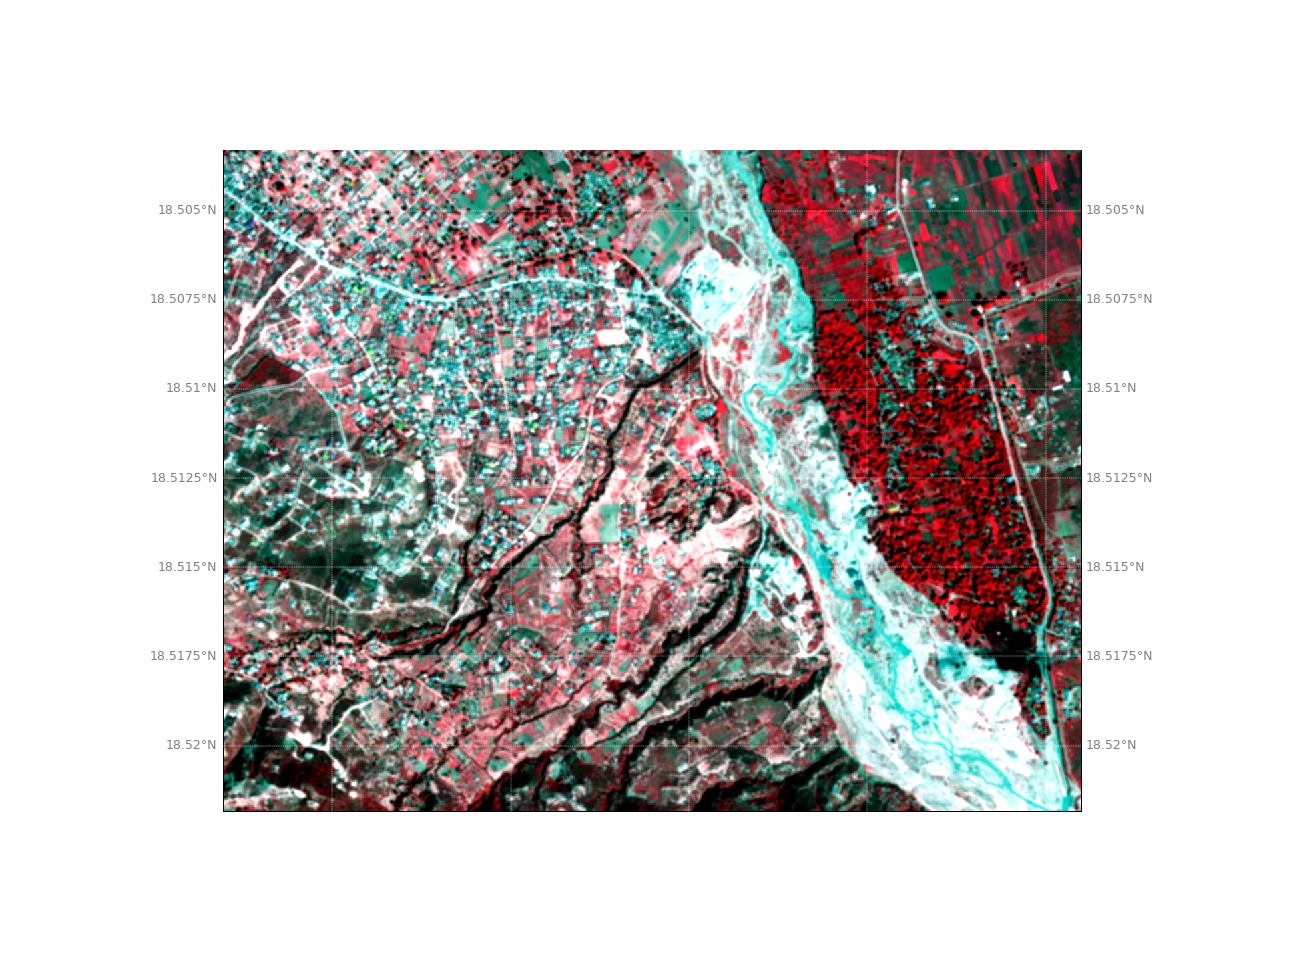

In [31]:
(garray + sub_array.astype(float)).moving(5).mean().show(bands=[4, 3, 2])

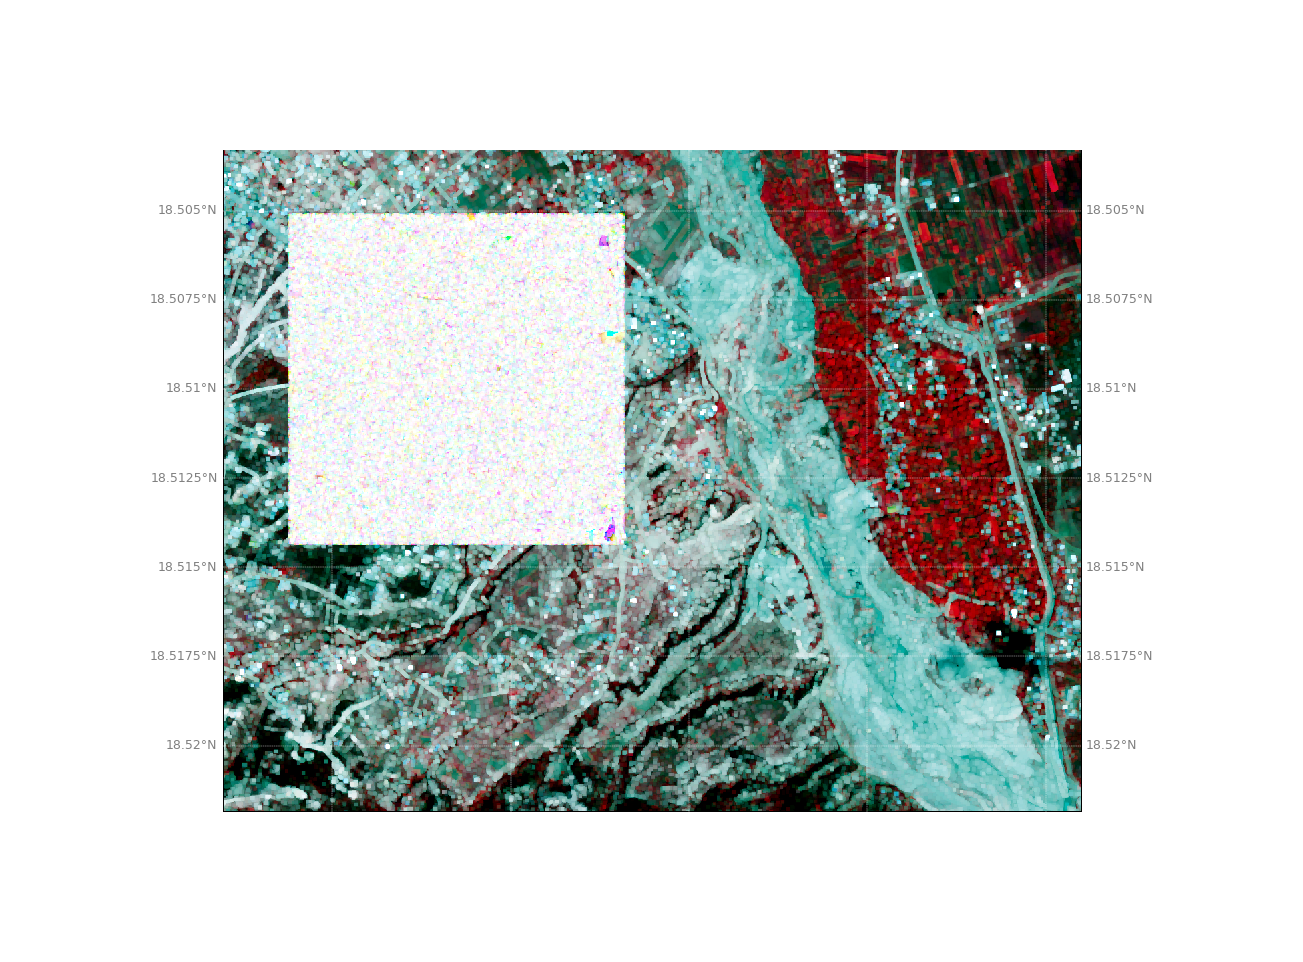

In [32]:
(garray * sub_array.astype(float)).moving(5).max().show(bands=[4, 3, 2])